In [1]:
%load_ext lab_black
%load_ext autotime
import pandas as pd
import numpy as np
import drnb as nb

time: 7.25 s (started: 2022-09-04 14:44:59 -07:00)


In [2]:
import drnb.io as nbio

irisx, irisy = nbio.read_dataxy("iris")

time: 111 ms (started: 2022-09-04 14:45:06 -07:00)


In [3]:
from sklearn.random_projection import SparseRandomProjection

seed = 42
transformer = SparseRandomProjection(n_components=2, random_state=seed)
iris_rp = transformer.fit_transform(irisx)

time: 27 ms (started: 2022-09-04 14:45:06 -07:00)


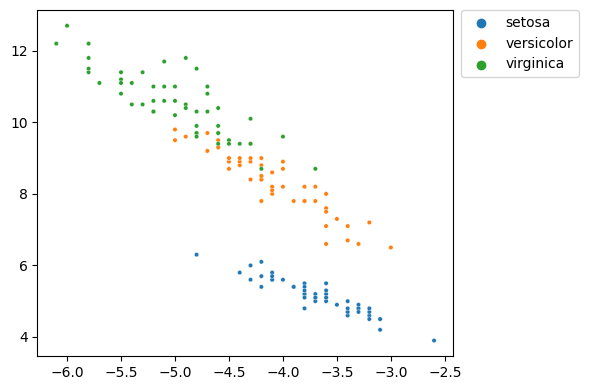

time: 502 ms (started: 2022-09-04 14:45:06 -07:00)


In [4]:
import drnb.plot as nbplot

nbplot.sns_embed_plot(iris_rp, irisy)

Reading/embedding/plotting/writing in one step:

[14:45:07] INFO     Loading faiss with AVX2 support.                                                   ]8;id=900776;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=449997;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#54\54]8;;\

           INFO     Could not load library with AVX2 support due to:                                   ]8;id=863856;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=155166;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#58\58]8;;\
                    ModuleNotFoundError("No module named 'faiss.swigfaiss_avx2'")                                  

           INFO     Loading faiss.                                                                     ]8;id=249616;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=794852;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#64\64]8;;\

           INFO     Successfully loaded faiss.                                                         ]8;id=150477;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=813216;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#66\66]8;;\

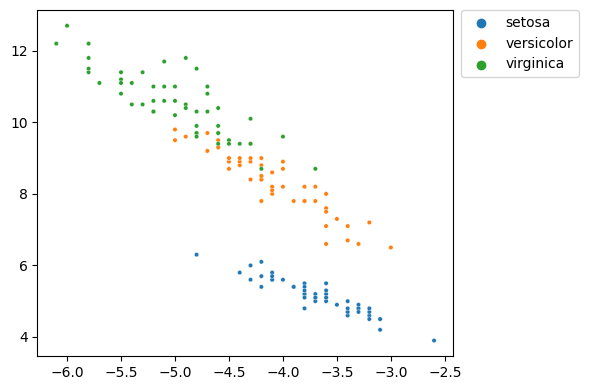

time: 3.51 s (started: 2022-09-04 14:45:07 -07:00)


In [5]:
iris_randproj = nb.embed_data(
    name="iris",
    method=nb.embedder("randproj", params=dict(random_state=42)),
    eval_metrics=[
        "rte",
        "rpc",
        "gs",
        ("nnp", dict(n_neighbors=15)),
        ("nnp", dict(n_neighbors=15)),
    ],
    export=("csv", dict(create_sub_dir=True)),
)

by setting `create_sub_dir=True`, we will create the `randproj` subdirectory if it doesn't already exist.

In [6]:
iris_randproj["_evaluations"]

[('rte', 0.8733333333333333),
 ('rpc', 0.9427759630867276),
 ('gs', 0.4107658),
 [('nnp15', 0.6182222222222221)],
 [('nnp15', 0.6182222222222221)]]

time: 4.22 ms (started: 2022-09-04 14:45:10 -07:00)


If you want to calculate the neighbor preservation multiple times, then providing multiple separate `nnp` evals is wasteful as you will be calculating the
nearest neighbors repeatedly. But passing one `nnp` evaluation with a list of the different value of `n_neighbors` you want the preservation evaluated at, the neighbor calculation is carried out only once:

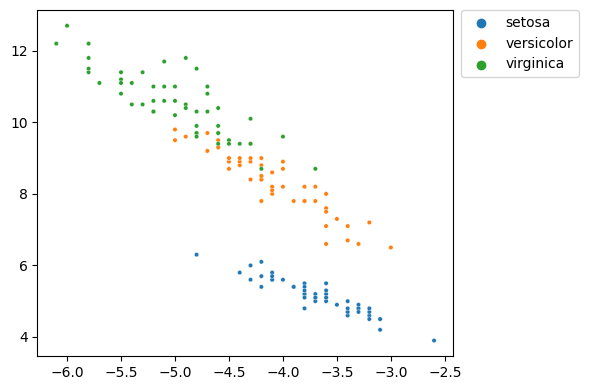

time: 1.01 s (started: 2022-09-04 14:45:10 -07:00)


In [7]:
iris_randproj = nb.embed_data(
    name="iris",
    method=nb.embedder("randproj", params=dict(random_state=42)),
    eval_metrics=[
        "rte",
        "rpc",
        "gs",
        ("nnp", dict(n_neighbors=[15, 50])),
    ],
    export=("csv", dict(create_sub_dir=True)),
)

In [8]:
iris_randproj["_evaluations"]

[('rte', 0.8880000000000001),
 ('rpc', 0.9449979323292309),
 ('gs', 0.4107658),
 [('nnp15', 0.6182222222222221), ('nnp50', 0.8490666666666667)]]

time: 3.76 ms (started: 2022-09-04 14:45:11 -07:00)
